In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics
import seaborn as sns

In [2]:
base = pd.read_csv('../Data/BaseData.csv')
base.shape

(2580, 299)

In [3]:
elastic = ElasticNet(alpha=1, l1_ratio=0.5)

In [4]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

In [5]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [6]:
elastic.fit(X_scaled,y)
Elastic_Score = elastic.score(X_scaled, y)

In [7]:
Elastic_Score

0.9116846901768204

In [8]:
len(elastic.predict(X))

2580

In [9]:
Elastic_Results = elastic.predict(X_scaled)

In [11]:
base_ordinal = pd.read_csv('../Data/BaseOrdinal.csv')
base_ordinal.shape

(2580, 83)

In [13]:
type(Elastic_Results)

numpy.ndarray

In [14]:
base_ordinal = base_ordinal.assign(Elastic = Elastic_Results)

In [15]:
base_ordinal.shape

(2580, 84)

In [16]:
base_ordinal.to_csv('Ordinal+Elastic.csv', index=False)

In [17]:
X_ordinal = base_ordinal.drop(['SalePrice'], axis=1).values
Y_ordinal = base_ordinal.SalePrice.values

In [18]:
X_ordinal.shape

(2580, 83)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X_ordinal,Y_ordinal,test_size=0.25)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
xgb = XGBRegressor()
xgb.fit(X_train_scaled, Y_train)
XGB_Score = xgb.score(X_test_scaled, Y_test)

In [20]:
XGB_Score

0.940538817313

In [21]:
Scores = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_ordinal,Y_ordinal,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    xgb = XGBRegressor()
    xgb.fit(X_train_scaled, Y_train)
    XGB_Score = xgb.score(X_test_scaled, Y_test)
    
    Scores.append(XGB_Score)

In [22]:
Positive = []
Negative = []

for i in Scores:
    if i < 0:
        Negative.append(i)
    else:
        Positive.append(i)

Median R2 is: 0.9307018381995871
Mean R2 is: 0.9222727956356219
Standard Deviation R2 is: 0.021626073034145564


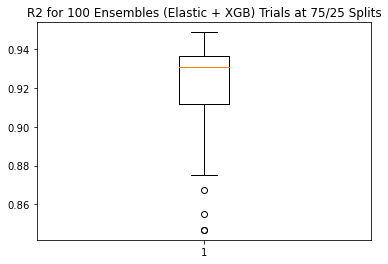

In [23]:
plt.boxplot(Positive)
plt.title('R2 for 100 Ensembles (Elastic + XGB) Trials at 75/25 Splits')
print("Median R2 is: " + str(statistics.median(Positive)))
print("Mean R2 is: " + str(statistics.mean(Positive)))
print("Standard Deviation R2 is: " + str(statistics.stdev(Positive)))

In [24]:
print("Number of times results produced Negative R2: " + str((len(Negative))))

Number of times results produced Negative R2: 0


In [25]:
Negative

[]

In [26]:
df = pd.DataFrame(Positive, columns=['Ensemble: Elastic + XGB'])
df.to_csv('Ensemble_E_XGB_Scores.csv', index=False)